# 기타

## 자주 사용하는 단축키

* ctrl + m h : 단축키 표시
* ctrl + shift + enter : 섹션 셀 삽입
* ctrl + m d : 선택 셀 삭제
* ctrl + enter : 코드셀 실행
* shift + enter : 셀을 실행하고 다음 셀 선택
* ctrl + m b : 아래에 코드 셀 삽입
* ctrl + m v : 아래에 텍스트 셀 삽입
* ctrl + . : 모든출력 지우기
* ctrl + shift + a : 모든 셀 선택




## 학습 라이브러리

- numpy
- scipy
- pandas
- scikit-learn



# Chapter2 데이터 전처리

## 2.1 데이터 탐색

### 2.1.3 파이썬 데이터 탐색

타이타닉 데이터

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 타이타닉 데이터
df_raw = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [17]:
# 변수 타입 변환
df_type = df_raw.copy()
df_type["Survived"]=df_type["Survived"].astype(str) # 범주형 변수
df_type["Pclass"]=df_type["Pclass"].astype(str)

print(df_type.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB
None


In [18]:
# 데이터 기술 통계 확인
df1 = df_type.copy()

print(df1.describe(include='all'))

        PassengerId Survived Pclass                     Name   Sex  \
count    891.000000      891    891                      891   891   
unique          NaN        2      3                      891     2   
top             NaN        0      3  Braund, Mr. Owen Harris  male   
freq            NaN      549    491                        1   577   
mean     446.000000      NaN    NaN                      NaN   NaN   
std      257.353842      NaN    NaN                      NaN   NaN   
min        1.000000      NaN    NaN                      NaN   NaN   
25%      223.500000      NaN    NaN                      NaN   NaN   
50%      446.000000      NaN    NaN                      NaN   NaN   
75%      668.500000      NaN    NaN                      NaN   NaN   
max      891.000000      NaN    NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique   

In [19]:
# pclass 탑승객의 빈도수
df1 = df_type.copy()
print(df1.groupby("Pclass").size())
print(df1.groupby("Pclass").count()["PassengerId"])

Pclass
1    216
2    184
3    491
dtype: int64
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


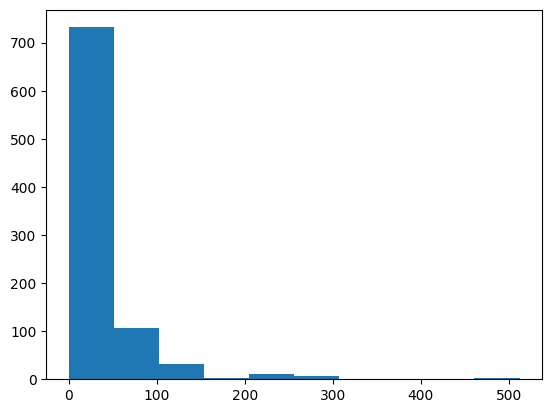

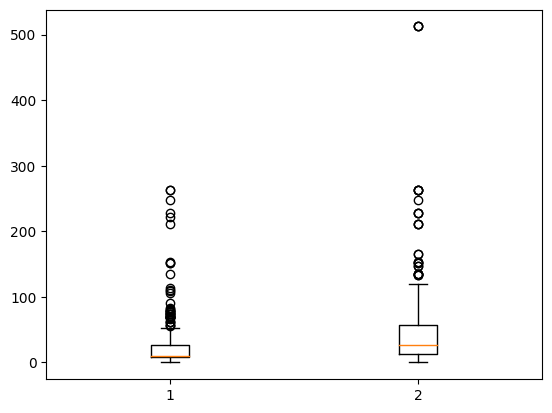

In [20]:
# Histogram
df1 = df_type.copy()
plt.hist(df1["Fare"])
plt.show()

# 데이터 분리
data_0 = df1[df1["Survived"]=='0']["Fare"]
data_1 = df1[df1["Survived"]=='1']["Fare"]

# boxplot
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()


In [21]:
# 성별 간에 생존자 수 차이
df_a = df_type.copy()


df_male = df_a[df_a["Sex"]=="male"]
df_female = df_a[df_a["Sex"]=="female"]
male_dead = df_male.groupby("Survived").size()[0]
male_survive = df_male.groupby("Survived").size()[1]
male_survive_rate = male_survive / (male_survive + male_dead)

female_dead = df_female.groupby("Survived").size()[0]
female_survive = df_female.groupby("Survived").size()[1]
female_survive_rate = female_survive / (female_survive + female_dead)

print("male survive rate : %0.3f \nfemale survive rate : %0.3f" %(male_survive_rate, female_survive_rate))



male survive rate : 0.189 
female survive rate : 0.742


## 2.2 데이터 전처리 개요

### 2.2.1 데이터 전처리 유형

데이터 전처리는 데이터 가공(data manipulation), 데이터 핸들링(data handling) 등 으로 불린다

### 2.2.2 데이터 변환

In [22]:
import numpy as np
import pandas as pd


#data 생성
meat_consumption_korean = 5*np.random.randn(1000)+53.9
meat_consumption_japan = 4*np.random.randn(1000)+32.7

meat_consumption_df = pd.DataFrame({"korean":meat_consumption_korean,
                                    "japanese":meat_consumption_japan})
print(meat_consumption_df)

        korean   japanese
0    51.100333  33.663855
1    57.844923  30.088554
2    55.312428  26.592090
3    48.913556  30.891451
4    53.354313  33.899345
..         ...        ...
995  50.690602  31.391777
996  55.308534  33.298867
997  50.743504  24.270432
998  54.114507  36.024837
999  53.811872  29.431516

[1000 rows x 2 columns]


In [23]:
# z 표준화 3가지
import scipy.stats as ss
df = meat_consumption_df.copy()
df["korean_zscore"] = ss.zscore(df["korean"])
df["japanese_zscore"] = ss.zscore(df["japanese"])

df["korean_zscore_np"] = (df["korean"]-np.mean(df["korean"]))/np.std(df["korean"])
df["japanese_zscore_np"] = (df["japanese"]-np.mean(df["japanese"]))/np.std(df["japanese"])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["korean_zscore_skl"] = scaler.fit_transform(df[["korean"]]) # series객체 넣어야함
df["japanese_zscore_skl"] = scaler.fit_transform(df[["japanese"]])
print(type(df["korean"]))
print(type(df[["korean"]]))

print(df)


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
        korean   japanese  korean_zscore  japanese_zscore  korean_zscore_np  \
0    51.100333  33.663855      -0.570515         0.261160         -0.570515   
1    57.844923  30.088554       0.806115        -0.619188          0.806115   
2    55.312428  26.592090       0.289211        -1.480124          0.289211   
3    48.913556  30.891451      -1.016855        -0.421490         -1.016855   
4    53.354313  33.899345      -0.110458         0.319145         -0.110458   
..         ...        ...            ...              ...               ...   
995  50.690602  31.391777      -0.654145        -0.298295         -0.654145   
996  55.308534  33.298867       0.288416         0.171289          0.288416   
997  50.743504  24.270432      -0.643347        -2.051788         -0.643347   
998  54.114507  36.024837       0.044705         0.842506          0.044705   
999  53.811872  29.431516      -0.017066        -0.780971

In [24]:
# minmax 표준화
from sklearn.preprocessing import MinMaxScaler

df = meat_consumption_df.copy()
scaler = MinMaxScaler()

df["korean_mm"] = scaler.fit_transform(df[["korean"]])
df["japanese_mm"] = scaler.fit_transform(df[["japanese"]])


df["korean_mm_np"]=(df["korean"]-df["korean"].min()) / (df["korean"].max()-df["korean"].min())
df["japanese_mm_np"]=(df["japanese"]-df["japanese"].min()) / (df["japanese"].max()-df["japanese"].min())
print(df)



        korean   japanese  korean_mm  japanese_mm  korean_mm_np  \
0    51.100333  33.663855   0.404227     0.479980      0.404227   
1    57.844923  30.088554   0.621821     0.349679      0.621821   
2    55.312428  26.592090   0.540118     0.222251      0.540118   
3    48.913556  30.891451   0.333677     0.378940      0.333677   
4    53.354313  33.899345   0.476945     0.488562      0.476945   
..         ...        ...        ...          ...           ...   
995  50.690602  31.391777   0.391008     0.397175      0.391008   
996  55.308534  33.298867   0.539992     0.466678      0.539992   
997  50.743504  24.270432   0.392715     0.137639      0.392715   
998  54.114507  36.024837   0.501470     0.566025      0.501470   
999  53.811872  29.431516   0.491707     0.325733      0.491707   

     japanese_mm_np  
0          0.479980  
1          0.349679  
2          0.222251  
3          0.378940  
4          0.488562  
..              ...  
995        0.397175  
996        0.466678

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/USJudgeRatings.csv")

1.0859724796276253
-1.5582154642293153


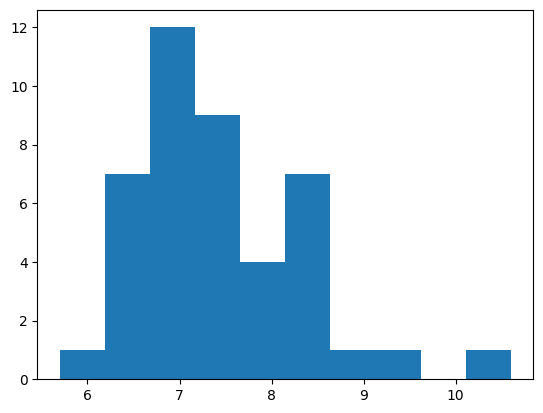

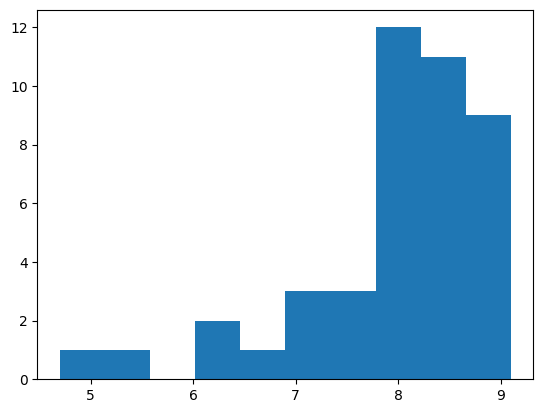

In [26]:
df1 = df.copy()
# 왜도
print(ss.skew(df1["CONT"]))
print(ss.skew(df1["PHYS"]))

plt.hist(df1["CONT"])
plt.show()

plt.hist(df1["PHYS"])
plt.show()


In [27]:
df1 = df.copy()

# 왜도에 따른 변수 변환
print(df1.head(5))
df["CONT2"] = np.log10(df["CONT"])
df["PHYS2"] = np.log10(np.max(df["PHYS"]+1)- df["PHYS"])

print(ss.skew(df["CONT2"]))
print(ss.skew(df["PHYS2"]))




       Unnamed: 0  CONT  INTG  DMNR  DILG  CFMG  DECI  PREP  FAMI  ORAL  WRIT  \
0   AARONSON,L.H.   5.7   7.9   7.7   7.3   7.1   7.4   7.1   7.1   7.1   7.0   
1  ALEXANDER,J.M.   6.8   8.9   8.8   8.5   7.8   8.1   8.0   8.0   7.8   7.9   
2  ARMENTANO,A.J.   7.2   8.1   7.8   7.8   7.5   7.6   7.5   7.5   7.3   7.4   
3     BERDON,R.I.   6.8   8.8   8.5   8.8   8.3   8.5   8.7   8.7   8.4   8.5   
4    BRACKEN,J.J.   7.3   6.4   4.3   6.5   6.0   6.2   5.7   5.7   5.1   5.3   

   PHYS  RTEN  
0   8.3   7.8  
1   8.5   8.7  
2   7.9   7.8  
3   8.8   8.7  
4   5.5   4.8  
0.6555571886692441
0.5824357748750438


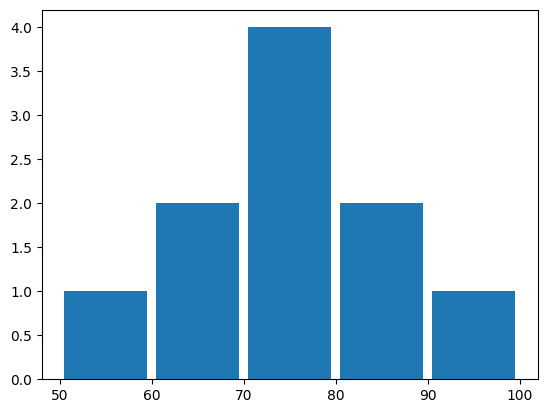

In [28]:
# histogram 범주화
data = [["철수", 52],["영희", 92],["미영", 84],["시완", 71],["미경", 65],["영환", 81],["숙경", 66],["부영", 77],["민섭", 73],["보연", 74]]
df = pd.DataFrame(data, columns=["이름", "성적"])

plt.hist(df["성적"], bins=5, range=[50,100], rwidth = 0.9) # 5개 구간
plt.show()

   이름  성적 등급
0  철수  52  F
1  영희  92  A
2  미영  84  A
3  시완  71  D
4  미경  65  F
5  영환  81  B
6  숙경  66  D
7  부영  77  B
8  민섭  73  C
9  보연  74  C


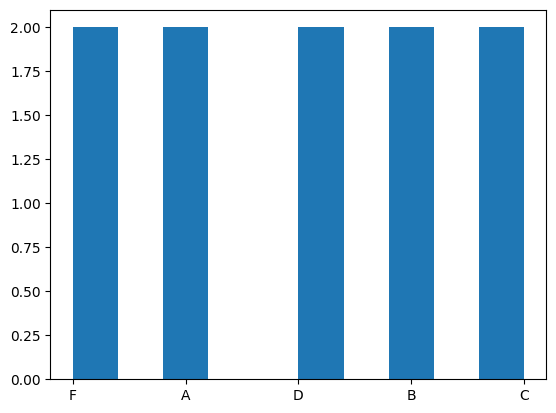

In [29]:
# 조건문으로 구간 나누기
# df2 = df.copy()
# df2["등급"] =0

# df2.loc[(df["성적"]<60),"등급"] = "F"
# df2.loc[(df["성적"]>=60)&(df["성적"]<70),"등급"] = "D"
# df2.loc[(df["성적"]>=70)&(df["성적"]<80),"등급"] = "C"
# df2.loc[(df["성적"]>=80)&(df["성적"]<90),"등급"] = "B"
# df2.loc[(df["성적"]>=90),"등급"] = "A"
# # print(df2)


# #cut 함수 이용
df4 = df.copy()
df4["등급"] = pd.cut(x=df4["성적"], bins=[0,60,70,80,90,100], labels=["F", "D", "C", "B", "A"],
                   include_lowest=True) # 각 구간의 낮은 경계값 포함
# print(df4)

# qcut : 각 범주에 균등한 수의 데이터 채워지도록 분할
df5 = df.copy()
df5["등급"] = pd.qcut(x=df5["성적"], q=5, labels=["F","D","C","B","A"])
print(df5)
plt.hist(df5["등급"])
plt.show()


### 2.2.3 차원축소 : PCA(주성분분석)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

In [31]:
# 범주형 변수 분리
df = iris.drop("species", axis=1)
df_species = iris["species"]
print(df_species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [32]:
# 변수 정규화
df2=df.copy()
print(df2.columns)

x = StandardScaler()
df2["sepal_length"] = x.fit_transform(df2[["sepal_length"]])
df2["sepal_width"] = x.fit_transform(df2[["sepal_width"]])
df2["petal_length"] = x.fit_transform(df2[["petal_length"]])
df2["petal_width"] = x.fit_transform(df2[["petal_width"]])

# print(df2)

# PCA 수행
pca = PCA(n_components=4)
p_score = pca.fit_transform(df2)
print(p_score.shape)
print(pca.explained_variance_ratio_)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


### 2.2.4 결측치 처리

In [33]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

In [34]:
print(df.isnull().sum())
print(df.isnull().sum().sum()) # 결측치 총 개수

df1 = df.dropna(axis=0)
print(df1.shape)

df2 = df.dropna(subset=["Age"], axis=0) # Age열의 na만 삭제
print(df2.shape)
# 평균값 대체
avg_age = df["Age"].mean()
df3 = df.copy()
df3["Age"].fillna(avg_age, inplace=True)
print(df3.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
866
(183, 12)
(714, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [35]:
# 최빈값 대체
df4 = df.copy()
print(df4.isnull().sum())
mode = df4["Embarked"].mode()[0]
df4["Embarked"].fillna(mode, inplace=True)
print(df4.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [36]:
# 인접값 대체
data = [1,2,3,None,None,None,5,6,7]
df = pd.DataFrame(data, columns=["test"])
print(df.fillna(method="ffill")) # 이전(앞선)데이터로 채움
print(df.fillna(method="bfill")) # 다음 데이터로 채움



   test
0   1.0
1   2.0
2   3.0
3   3.0
4   3.0
5   3.0
6   5.0
7   6.0
8   7.0
   test
0   1.0
1   2.0
2   3.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   7.0


### 2.2.5 이상치 처리

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10*np.random.randn(200)+50
df = pd.DataFrame({"data":data})
df.loc[200] = 2
df.loc[201] = 100
df.loc[202] = 10
df.loc[203] = 110



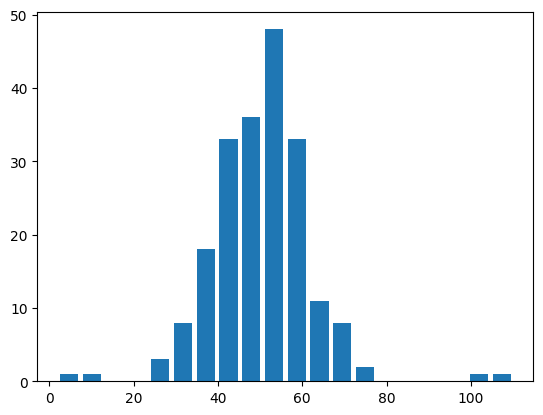

In [38]:
# 히스토그램 판별

plt.hist(df, bins=20, rwidth=0.8)
plt.show()

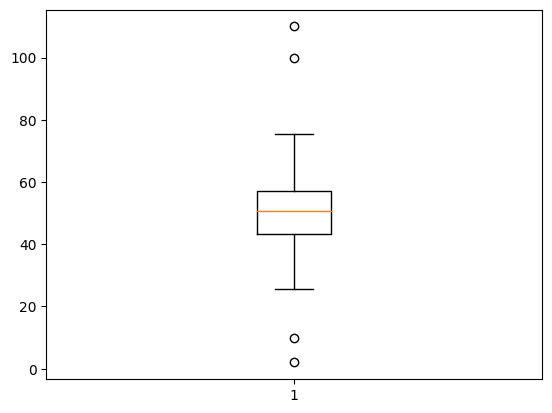

43.40946369224487 57.00129728682847 13.591833594583598
             data
count  204.000000
mean    50.441613
std     11.980253
min      2.000000
25%     43.409464
50%     50.775185
75%     57.001297
max    110.000000


In [39]:
# IQR 사용
df2 = df.copy()
plt.boxplot(df2["data"])
plt.show()

Q1 = df2["data"].quantile(.25)
Q3 = df2["data"].quantile(.75)
IQR = Q3-Q1
print(Q1, Q3, IQR)

print(df2.describe())


In [40]:
# outlier 구하기
df3 = df.copy()

low_con = Q1 - 1.5*IQR
upper_con = Q3 + 1.5*IQR
low_out = df3[df3["data"]<low_con]
upper_out = df3[df3["data"]>upper_con]
print(low_out, upper_out, sep="\n")

     data
200   2.0
202  10.0
      data
201  100.0
203  110.0


### 2.2.6 평활화(smoothing)


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/lynx.csv")

In [42]:
df2 = df.copy()
df2 = df2.iloc[:,1:]

print(df2.head(5))
print(df2.info())

   time  value
0  1821    269
1  1822    321
2  1823    585
3  1824    871
4  1825   1475
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   time    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None


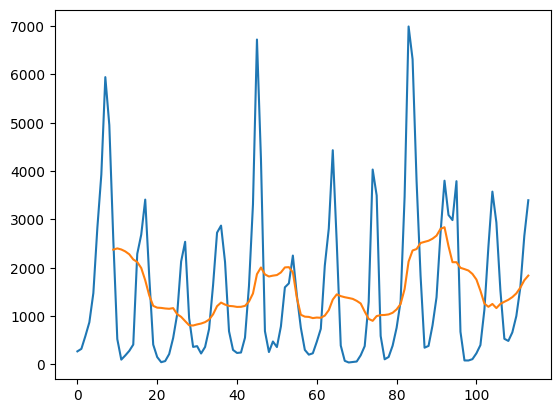

In [43]:
# 단순이동평균
df3 = df2.copy()
df3["sma"] = df3["value"].rolling(10).mean()

plt.plot(df3["value"])
plt.plot(df3["sma"])
plt.show()

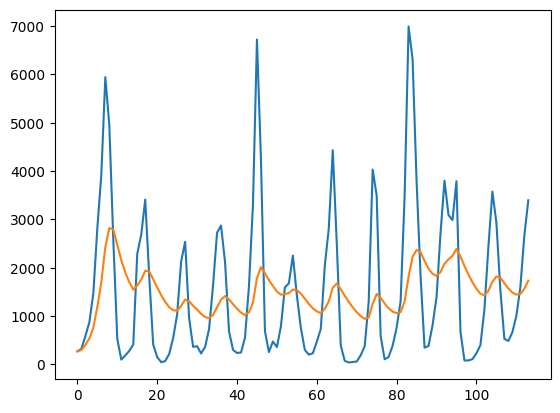

In [44]:
# 지수 이동평균
df4 = df2.copy()
df4["ewma"] = df4["value"].ewm(10).mean()
plt.plot(df4["value"])
plt.plot(df4["ewma"])
plt.show()

# Chapter3 데이터 분석

## 3.1 빅데이터 분석 과정

### 3.1.3 분석모델 성능 평가 방법


#### 지도학습-분류

In [45]:
# confusion matrix(오차행렬)
# accuracy 정확도
# precision 정밀도
# recall 재현율
# f1 score
# roc
# auc

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
titanic = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")


# 전처리
titanic.drop("Cabin", axis=1, inplace=True)
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
titanic["FamilySize"] = titanic["SibSp"]+titanic["Parch"]
titanic["Sex"] = LabelEncoder().fit_transform(titanic["Sex"])
titanic["Embarked"] = LabelEncoder().fit_transform(titanic["Embarked"])

y = titanic["Survived"]
x = titanic[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)


# 모델 fitting
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)


              precision    recall  f1-score   support

           0       0.83      0.78      0.81       117
           1       0.63      0.71      0.67        62

    accuracy                           0.75       179
   macro avg       0.73      0.74      0.74       179
weighted avg       0.76      0.75      0.76       179

confusion matrix : 
 [[91 26]
 [18 44]]
accuracy :  0.7541899441340782 0.7541899441340782
precision :  0.6285714285714286 0.6285714285714286 0.8348623853211009
recall :  0.7096774193548387 0.7096774193548387 0.7777777777777778
f1 score :  0.6666666666666666 0.6666666666666666 0.8053097345132744
fpr:  [0.         0.22222222 1.        ] 0.2222222222222222
tpr:  [0.         0.70967742 1.        ] 0.7096774193548387
auc_score :  0.7437275985663082 0.7437275985663082


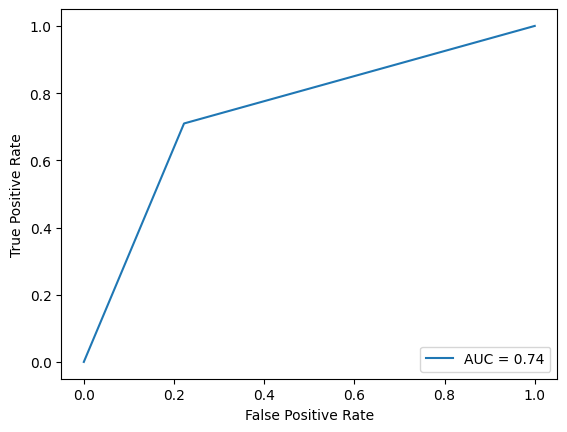

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

rept = classification_report(y_test, pred)
print(rept)

# confusion matrix(오차행렬)
confu = confusion_matrix(y_test, pred)
print("confusion matrix : \n", confu)

# x축이 모델 y축이 실제답
TN = confu[0][0]
FP = confu[0][1]
FN = confu[1][0]
TP = confu[1][1]

# accuracy 정확도
acc = accuracy_score(y_test, pred)
acc_cal = (TN+TP)/(TN+FN+FP+TP)
print("accuracy : ", acc, acc_cal)

# precision 정밀도
prec = precision_score(y_test, pred)
prec_cal_p = TP/(TP+FP)
prec_cal_n = TN/(TN+FN)
print("precision : ", prec, prec_cal_p, prec_cal_n)

# recall 재현율
rec = recall_score(y_test,pred)
rec_cal_p = TP/(TP+FN)
rec_cal_n = TN/(TN+FP)
print("recall : ", rec, rec_cal_p, rec_cal_n)

# f1 score
f1 = f1_score(y_test, pred)
f1_cal_p = 2*(prec_cal_p*rec_cal_p)/(prec_cal_p+rec_cal_p)
f1_cal_n = 2*(prec_cal_n*rec_cal_n)/(prec_cal_n+rec_cal_n)
print("f1 score : ", f1, f1_cal_p, f1_cal_n)


# roc, auc
fpr_cal = FP/(FP+TN)
tpr_cal = TP/(TP+FN)
fpr, tpr, thresholds = roc_curve(y_test, pred)
print("fpr: ", fpr, fpr_cal)
print("tpr: ", tpr, tpr_cal)

auc_score = auc(fpr, tpr)
auc_score2 = roc_auc_score(y_test,pred)
print("auc_score : ", auc_score, auc_score2)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
display.plot()
plt.show()


#### 지도학습-회귀(예측)

In [48]:
# 지도학습-회귀(예측)
## mse(mean squared error)
## rmse(root mse)
## rmsle(root mean squared logarithmic error)
## mae(mean absolute error)
## r2 (r-squared)
## adjusted r2
## mspe(mean squared percentage error)
## mape(mean absolute percentage error)
## aic (akaike information criterion)
## bic (bayes information criterion)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 단순 선형회귀 분석용 데이터
# mpg : 연비
# cylinders:실린더개수
# displacement : 배기량
# acceleration:가속력
# model year : 출시년도
auto_mpg = pd.read_csv("/content/drive/MyDrive/bigdata_sample/auto-mpg.csv")

# 전처리 및 모델 fitting
auto_mpg["horsepower"] = auto_mpg["horsepower"].fillna(auto_mpg["horsepower"].mean())
x = auto_mpg[["weight"]]
y = auto_mpg["mpg"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

# 다중선형
x_mul = auto_mpg[["weight","horsepower","cylinders","displacement"]]
y_mul = auto_mpg["mpg"]
x_train_mul, x_test_mul, y_train_mul, y_test_mul = train_test_split(x_mul, y_mul, test_size=0.2, random_state=10)
model_mul = LinearRegression()
model_mul.fit(x_train_mul,y_train_mul)
pred_mul = model_mul.predict(x_test_mul)


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error ,mean_squared_log_error
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

## mse(mean squared error)
mse = mean_squared_error(y_test, pred)
mse_cal = sum((y_test-pred)**2)/len(y_test)
print("mse : ", mse, mse_cal)

## rmse(root mse)
rmse = np.sqrt(mse)
print("rmse : ", rmse)

## rmsle(root mean squared logarithmic error)
msle = mean_squared_log_error(y_test, pred)
print("msle : ", msle)

## mae(mean absolute error)
mae = mean_absolute_error(y_test, pred)
mae_cal = sum(abs(y_test-pred))/len(y_test)
print("mae : ", mae, mae_cal)

## r2 (r-squared)
r2 = r2_score(y_test, pred)
def r2_cal(y_test, pred):
  y_mean = y_test.mean()
  SST = sum((y_test-y_mean)**2)
  SSR = sum((y_test-pred)**2) # 설명이 안된부분
  SSE = sum((pred-y_mean)**2) # 설명이 된 부분
  r2 = 1-SSR/SST
  # r2 = SSE/SST
  return r2
print("r2 : ", r2, r2_cal(y_test, pred))

## adjusted r2
n = len(y_test_mul)
k = x_test_mul.shape[1]
r2_mul = r2_score(y_test_mul, pred_mul)
r2_adj = 1-(n-1)*(1-r2_mul)/(n-k-1)
print("r2_adj : ", r2_adj)


## mspe(mean squared percentage error)
mspe = sum(((y_test-pred)/y_test)**2)/len(y_test)
print("mspe : ", mspe)

## mape(mean absolute percentage error)
mape = mean_absolute_percentage_error(y_test, pred)
mape_cal = sum(abs((y_test-pred)/y_test))/len(y_test)
print("mape : ", mape, mape_cal)

## aic (akaike information criterion)
## bic (bayes information criterion)




mse :  19.911491481165065 19.911491481165058
rmse :  4.46222942946293
msle :  0.0335669480842966
mae :  3.5057177778108484 3.505717777810849
r2 :  0.6744094188553618 0.6744094188553619
r2_adj :  0.6739415708356971
mspe :  0.045470782451595915
mape :  0.16553450961953042 0.16553450961953042


#### 비지도학습

In [51]:
#silhouette(실루엣 계수)
#Dunn Index

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

iris=pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

# 전처리
iris["species"] = LabelEncoder().fit_transform(iris["species"])
# x = iris.drop("species", axis=1)
x = iris.copy()
# fitting
model = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42)
model.fit(x)

cluster_center = model.cluster_centers_
cluster_prediction = model.predict(x)

print(cluster_center)
print(cluster_prediction)
# print(pd.DataFrame(cluster_center))
# print(cluster_prediction)
inertia = model.inertia_
print("inertia : ", inertia)
sco = model.score(iris)
print(sco)

[[6.62244898 2.98367347 5.57346939 2.03265306 2.        ]
 [5.006      3.428      1.462      0.246      0.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
inertia :  87.22062785114048
-87.22062785114046


In [53]:
from sklearn.metrics import silhouette_score, silhouette_samples

iris_property = iris.drop("species", axis=1)
labels = cluster_prediction
# print(iris_property)
silhouette = silhouette_score(iris_property, labels)
print(silhouette)

score_samples = silhouette_samples(iris_property, labels)
iris_property['silhouette_coeff'] = score_samples
average_score = silhouette_score(iris_property, labels)

iris_property.head(3)

0.5111496981090736


,sepal_length,sepal_width,petal_length,petal_width,silhouette_coeff
0,5.1,3.5,1.4,0.2,0.846713
1,4.9,3.0,1.4,0.2,0.807609
2,4.7,3.2,1.3,0.2,0.822507


## 3.2 지도학습 - 분류

### 사용 모듈

In [54]:
import pandas as pd
import numpy as np

# 전처리용 모듈
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# 분류 모델 모듈
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 평가 지표
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


### 3.2.1 의사결정나무

In [55]:
# 의사결정나무

# data
titanic = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

# 전처리
titanic.drop("Cabin", axis=1, inplace=True)
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
print(titanic.info())
le = LabelEncoder()
titanic["Sex"] =le.fit_transform(titanic["Sex"])
titanic["Embarked"]= le.fit_transform(titanic["Embarked"])
y = titanic["Survived"]
x = titanic[["Pclass","Sex","Age","Fare","Embarked"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

# 모델 fitting
dctree = DecisionTreeClassifier()
dctree.fit(x_train, y_train)
pred = dctree.predict(x_test)

# 모델 평가
acc = accuracy_score(y_test, pred)
rept = classification_report(y_test,pred)
conf = confusion_matrix(y_test,pred)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


### 3.2.2 KNN

In [56]:
# knn

# data
iris = pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

# 전처리
minmax = MinMaxScaler()
iris["sepal_length"] = minmax.fit_transform(iris[["sepal_length"]])
iris["sepal_width"] = minmax.fit_transform(iris[["sepal_width"]])
iris["petal_length"] = minmax.fit_transform(iris[["petal_length"]])
iris["petal_width"] = minmax.fit_transform(iris[["petal_width"]])
x = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris["species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# 모델 fitting
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors값이 달라짐에 따라 성능 달라짐 조정
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

# 모델 평가
rep = classification_report(y_test, pred)
print(rep)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



### 3.2.3 SVM


In [57]:
# SVM
# 범주형 변수 one-hot encoding 필요

# data
titanic = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

# 전처리
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
titanic.drop("Cabin", axis=1,inplace=True)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
onehot_sex = pd.get_dummies(titanic["Sex"]) # one-hot encoding
onehot_embarked = pd.get_dummies(titanic["Embarked"])
titanic = pd.concat([titanic, onehot_sex, onehot_embarked], axis=1)
y = titanic["Survived"]
x = titanic[["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S"]]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=10)

# 모델 fitting
svm = SVC()
svm.fit(x_train,y_train)
pred = svm.predict(x_test)

# 모델 평가
rep = classification_report(y_test, pred)
print(rep)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268



### 3.2.4 로지스틱 회귀

In [58]:
# 로지스틱 회귀

# data
iris = pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

# 전처리
mx = MinMaxScaler()
iris["sepal_length"] = mx.fit_transform(iris[["sepal_length"]])
iris["sepal_width"] = mx.fit_transform(iris[["sepal_width"]])
iris["petal_length"] = mx.fit_transform(iris[["petal_length"]])
iris["petal_width"] = mx.fit_transform(iris[["petal_width"]])
y = iris["species"]
x = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# 모델 fitting
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)


# 모델 평가
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      0.70      0.74        10
   virginica       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.83      0.83      0.83        30



### 3.2.5 랜덤 포레스트

In [59]:
# 랜덤 포레스트

# data
titanic = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

# 전처리
titanic.drop("Cabin", axis=1, inplace = True)
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
le = LabelEncoder()
titanic["Sex"] = le.fit_transform(titanic["Sex"])
titanic["Embarked"] = le.fit_transform(titanic["Embarked"])
y=titanic["Survived"]
x=titanic[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# 모델 fitting
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

# 모델 평가
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       118
           1       0.95      0.62      0.75        61

    accuracy                           0.86       179
   macro avg       0.89      0.80      0.83       179
weighted avg       0.87      0.86      0.85       179



### 모델 비교

In [60]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as dstc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lrc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

titanic = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

# 전처리
titanic.drop("Cabin", axis=1, inplace=True)
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
le = LabelEncoder()
titanic["Sex"] =le.fit_transform(titanic["Sex"])
titanic["Embarked"]= le.fit_transform(titanic["Embarked"])
y = titanic["Survived"]
x = titanic[["Pclass","Sex","Age","Fare","Embarked"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

dst = dstc()
knn = knnc()
svm = svc()
lr = lrc()
rf = rfc()

dst.fit(x_train,y_train)
knn.fit(x_train,y_train)
svm.fit(x_train,y_train)
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)

dst_pred = dst.predict(x_test)
knn_pred = knn.predict(x_test)
svm_pred = svm.predict(x_test)
lr_pred = lr.predict(x_test)
rf_pred = rf.predict(x_test)

dst_rprt = classification_report(y_test, dst_pred)
knn_rprt = classification_report(y_test, knn_pred)
svm_rprt = classification_report(y_test, svm_pred)
lr_rprt = classification_report(y_test, lr_pred)
rf_rprt = classification_report(y_test, rf_pred)

dst_auc = roc_auc_score(y_test, dst_pred)
knn_auc = roc_auc_score(y_test, knn_pred)
svm_auc = roc_auc_score(y_test, svm_pred)
lr_auc = roc_auc_score(y_test, lr_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

print(dst_rprt, knn_rprt, svm_rprt, lr_rprt, rf_rprt, sep="\n")
print(dst_auc, knn_auc, svm_auc, lr_auc, rf_auc, sep="\n")

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       118
           1       0.68      0.69      0.68        61

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.60      0.48      0.53        61

    accuracy                           0.72       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.70      0.72      0.71       179

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       118
           1       0.70      0.31      0.43        61

    accuracy                           0.72       179
   macro avg       0.71      0.62      0.62       179
weighted avg       0.72      0.72      0.68       179

              preci

In [61]:
iris = pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

# 전처리
iris["species"] = LabelEncoder().fit_transform(iris["species"])
# minmax = MinMaxScaler()
# iris["sepal_length"] = minmax.fit_transform(iris[["sepal_length"]])
# iris["sepal_width"] = minmax.fit_transform(iris[["sepal_width"]])
# iris["petal_length"] = minmax.fit_transform(iris[["petal_length"]])
# iris["petal_width"] = minmax.fit_transform(iris[["petal_width"]])
x = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris["species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

dst.fit(x_train,y_train)
knn.fit(x_train,y_train)
svm.fit(x_train,y_train)
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)

dst_pred = dst.predict(x_test)
knn_pred = knn.predict(x_test)
svm_pred = svm.predict(x_test)
lr_pred = lr.predict(x_test)
rf_pred = rf.predict(x_test)


dst_rprt = classification_report(y_test, dst_pred)
knn_rprt = classification_report(y_test, knn_pred)
svm_rprt = classification_report(y_test, svm_pred)
lr_rprt = classification_report(y_test, lr_pred)
rf_rprt = classification_report(y_test, rf_pred)

dst_acc = accuracy_score(y_test, dst_pred)
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)
lr_acc = accuracy_score(y_test, lr_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# print(dst_rprt, knn_rprt, svm_rprt, lr_rprt, rf_rprt, sep="\n")
print("dst_acc : ",dst_acc)
print("knn_acc : ",knn_acc)
print("svm_acc : ",svm_acc)
print("lr_acc : ",lr_acc)
print("rf_acc : ",rf_acc)


dst_acc :  0.9333333333333333
knn_acc :  0.9666666666666667
svm_acc :  0.9333333333333333
lr_acc :  0.9333333333333333
rf_acc :  0.9333333333333333


## 3.3 지도학습 - 회귀(예측)

### 사용 모듈


In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error



### 3.3.1 단순 선형회귀

In [63]:
# 단순 선형회귀

# data
# mpg : 연비
# cylinders:실린더개수
# displacement : 배기량
# acceleration:가속력
# model year : 출시년도
auto_mpg = pd.read_csv("/content/drive/MyDrive/bigdata_sample/auto-mpg.csv")

# 전처리
auto_mpg = auto_mpg.dropna(axis=0)
y = auto_mpg["mpg"]
x = auto_mpg[["weight"]]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

# 모델 fitting
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

# 모델 평가
r2 = r2_score(y_test, pred)
print(r2)

0.7015633872576372


### 3.3.2 다중 선형회귀

In [64]:
# 다중 선형회귀

# data
housing = pd.read_csv("/content/drive/MyDrive/bigdata_sample/housing.csv")

# 전처리
housing.dropna(axis=0, inplace=True)
housing.drop("ocean_proximity", axis=1, inplace=True)
y = housing["median_house_value"]
x = housing.drop("median_house_value", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 fitting
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

# 모델 평가
r2 = r2_score(y_test, pred)
print(r2)
n = len(y_test)
k = x.shape[1]
r2_adj = 1-(((n-1)*(1-r2))/(n-k-1))
print(r2_adj)

0.6445130291082337
0.6440484161745408


### 3.3.3 의사결정나무

In [65]:
# 의사결정나무

# data
housing = pd.read_csv("/content/drive/MyDrive/bigdata_sample/housing.csv")

# 전처리
housing.dropna(axis=0, inplace=True)
housing.drop("ocean_proximity", axis=1, inplace=True)
y = housing["median_house_value"]
x = housing.drop("median_house_value", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 fitting
# dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)

# 모델 평가
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mse, r2)


4492421544.933442 0.6630077028770314


### 3.3.4 랜덤 포레스트

In [66]:
# 랜덤 포레스트

# data
housing = pd.read_csv("/content/drive/MyDrive/bigdata_sample/housing.csv")

# 전처리
housing.dropna(axis=0, inplace=True)
housing.drop("ocean_proximity", axis=1, inplace=True)
y = housing["median_house_value"]
x = housing.drop("median_house_value", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 fitting
# rf = RandomForestRegressor(max_depth=3, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

# 모델 평가
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
n = len(y_test)
k = x_test.shape[1]
r2_adj = 1-((n-1)*(1-r2)/(n-1-k))
print(mse, r2, r2_adj)

2414341728.879658 0.8188917586835565 0.818655054561594


## 3.4 비지도학습

### 3.4.1 군집분석 k-means

In [67]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [68]:
# k-means

# data
iris=pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

# 전처리
iris["species"] = LabelEncoder().fit_transform(iris["species"])

# 모델 fitting
# cluster= KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42)
cluster= KMeans(n_clusters=3, n_init=10, random_state=42)
cluster.fit(iris)
cluster_center = cluster.cluster_centers_
cluster_prediction = cluster.predict(iris)

# 모델 평가
print(cluster.n_clusters)
inertia = cluster.inertia_
print(inertia)


3
87.22062785114048


### 3.4.2 연관분석

In [70]:
import sklearn.cluster

# dir(sklearn)
# import sklearn.feature_selection
# dir(sklearn.feature_selection)
# print(sklearn.datasets.__all__)

['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']
